# Sympy voorbeeld 2

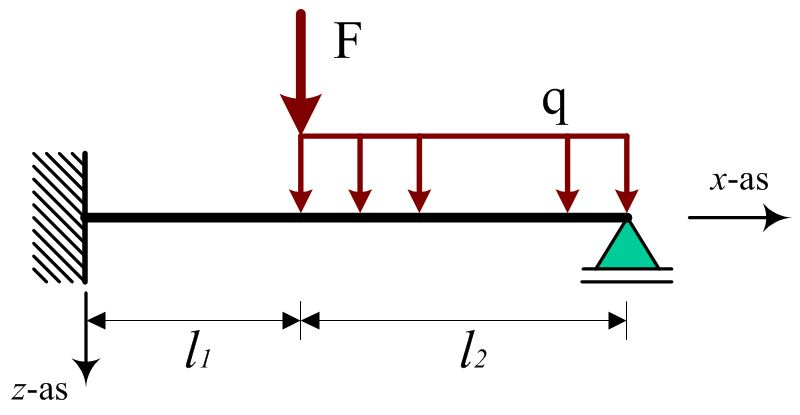

In [1]:
import sympy as sp
x, C1, C2, C3, C4, C5, C6, C7, C8, q, F, EI, L1, L2 = sp.symbols('x C1 C2 C3 C4 C5 C6 C7 C8 q F EI L1 L2')

Definieer de verplaatsingen $w_1$ en $w_2$. 

$w_1$ voor $0 < x < L_1$

$w_2$ voor $L_1 < x < L_1+L_2$

In [2]:
w1 = C1 * x**3 / 6 + C2 * x**2 / 2 + C3 * x + C4

In [3]:
w2 = q * x**4 / (24 * EI) + C5 * x**3 / 6 + C6 * x**2 / 2 + C7 * x + C8

Druk de verdraaiingen ($\phi$), de momenten ($M$) en de dwarskrachten ($V$) uit in $w_1$ en $w_2$.

$\phi_1$, $\kappa_1$, $M_1$, $V_1$ voor $0 < x < L_1$

$\phi_2$, $\kappa_2$, $M_2$, $V_2$ voor $L_1 < x < L_1+L_2$

In [4]:
phi1 = -w1.diff(x)
phi2 = -w2.diff(x)
kappa1 = phi1.diff(x)
kappa2 = phi2.diff(x)
M1 = EI * kappa1
M2 = EI * kappa2
V1 = M1.diff(x)
V2 = M2.diff(x)

Geef de rand- en overgangsvoorwaarden om de onbekenden ($C_1$ t/m $C_8$) op te lossen. (8 onbekenden, dus 8 vergelijkingen nodig).

In [5]:
eq1 = sp.Eq(phi1.subs(x,0),0)
eq2 = sp.Eq(w1.subs(x,0),0)
eq3 = sp.Eq(w1.subs(x,L1),w2.subs(x,L1))
eq4 = sp.Eq(phi1.subs(x,L1),phi2.subs(x,L1))
eq5 = sp.Eq(M1.subs(x,L1),M2.subs(x,L1))
eq6 = sp.Eq(V1.subs(x,L1),V2.subs(x,L1)+F)
eq7 = sp.Eq(w2.subs(x,L1+L2),0)
eq8 = sp.Eq(M2.subs(x,L1+L2),0)

Laat Maple de 8 onbekenden oplossen met behulp van de 8 hierboven gegeven vergelijkingen.

In [6]:
sol = sp.solve((eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8),(C1,C2,C3,C4,C5,C6,C7,C8))
display(sol)
w1_sol = w1.subs(sol)
phi1_sol = phi1.subs(sol)
M1_sol = M1.subs(sol)
V1_sol = V1.subs(sol)
w2_sol = w2.subs(sol)
phi2_sol = phi2.subs(sol)
M2_sol = M2.subs(sol)
V2_sol = V2.subs(sol)

{C1: (-12*F*L1**2*L2 - 24*F*L1*L2**2 - 8*F*L2**3 - 6*L1**2*L2**2*q - 12*L1*L2**3*q - 5*L2**4*q)/(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3),
 C2: (4*F*L1**2*L2 + 8*F*L1*L2**2 + 2*L1**2*L2**2*q + 4*L1*L2**3*q + L2**4*q)/(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2),
 C3: 0,
 C4: 0,
 C5: (8*F*L1**3 + 12*F*L1**2*L2 - 8*L1**4*q - 24*L1**3*L2*q - 30*L1**2*L2**2*q - 20*L1*L2**3*q - 5*L2**4*q)/(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3),
 C6: (-8*F*L1**3 - 12*F*L1**2*L2 + 4*L1**4*q + 8*L1**3*L2*q + 6*L1**2*L2**2*q + 4*L1*L2**3*q + L2**4*q)/(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2),
 C7: (3*F*L1**2 - L1**3*q)/(6*EI),
 C8: (-4*F*L1**3 + L1**4*q)/(24*EI)}

In [7]:
w1_sub = w1_sol.subs([(F,20),(L1,3),(L2,5),(q,8),(EI,1000)])
phi1_sub = phi1_sol.subs([(F,20),(L1,3),(L2,5),(q,8),(EI,1000)])
M1_sub = M1_sol.subs([(F,20),(L1,3),(L2,5),(q,8),(EI,1000)])
V1_sub = V1_sol.subs([(F,20),(L1,3),(L2,5),(q,8),(EI,1000)])
w2_sub = w2_sol.subs([(F,20),(L1,3),(L2,5),(q,8),(EI,1000)])
phi2_sub = phi2_sol.subs([(F,20),(L1,3),(L2,5),(q,8),(EI,1000)])
M2_sub = M2_sol.subs([(F,20),(L1,3),(L2,5),(q,8),(EI,1000)])
V2_sub = V2_sol.subs([(F,20),(L1,3),(L2,5),(q,8),(EI,1000)])

Je kunt checken of het klopt. Zijn de zakkingen $w_1$ en $w_2$ nu hetzelfde op $x = 3m$? Ja! Je kunt natuurlijk alle andere rand- en overgangsvoorwaarden ook checken.

In [8]:
display(w1_sub.subs(x,3).evalf())
display(w2_sub.subs(x,3).evalf())

0.165893554687500

0.165893554687500

we kunnen de velden ook aan elkaar plakken, zodat je een gehele zakkings-, momenten- en dwarskrachtenlijn van de constructie krijgen.

In [9]:
w = sp.Piecewise((w1_sub,(x>=0) & (x<=3)),(w2_sub,(x>3)&(x<=8)))
phi = sp.Piecewise((phi1_sub,(x>=0) & (x<=3)),(phi2_sub,(x>3)&(x<=8)))
M = sp.Piecewise((M1_sub,(x>=0) & (x<=3)),(M2_sub,(x>3)&(x<=8)))
V = sp.Piecewise((V1_sub,(x>=0) & (x<=3)),(V2_sub,(x>3)&(x<=8)))
display(w)
display(phi)
display(M)
display(V)

Piecewise((-231*x**3/40960 + 181*x**2/5120, (x >= 0) & (x <= 3)), (x**4/3000 - 19373*x**3/3072000 + 2989*x**2/128000 + 27*x/500 - 63/1000, (x <= 8) & (x > 3)))

Piecewise((693*x**2/40960 - 181*x/2560, (x >= 0) & (x <= 3)), (-x**3/750 + 19373*x**2/1024000 - 2989*x/64000 - 27/500, (x <= 8) & (x > 3)))

Piecewise((17325*x/512 - 4525/64, (x >= 0) & (x <= 3)), (-4*x**2 + 19373*x/512 - 2989/64, (x <= 8) & (x > 3)))

Piecewise((17325/512, (x >= 0) & (x <= 3)), (19373/512 - 8*x, (x <= 8) & (x > 3)))

Ook kunnen we de lijnen $w$, $\phi$, $V$ en $M$ plotten in Python

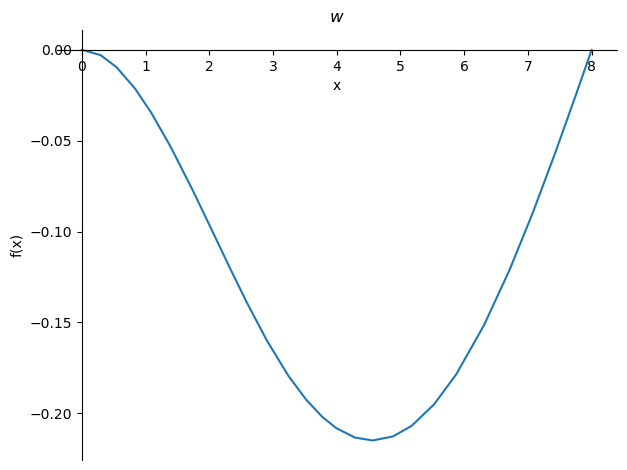

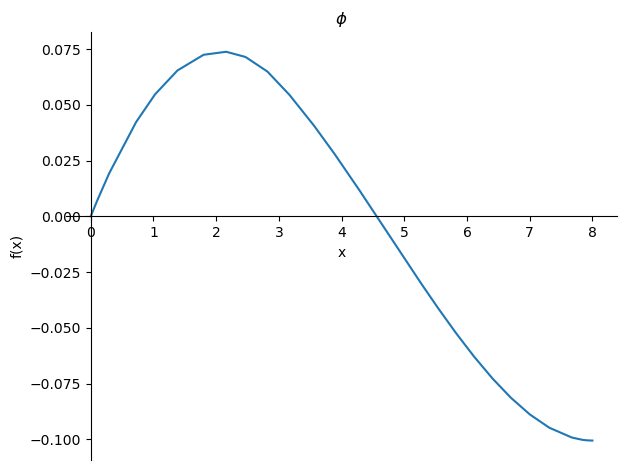

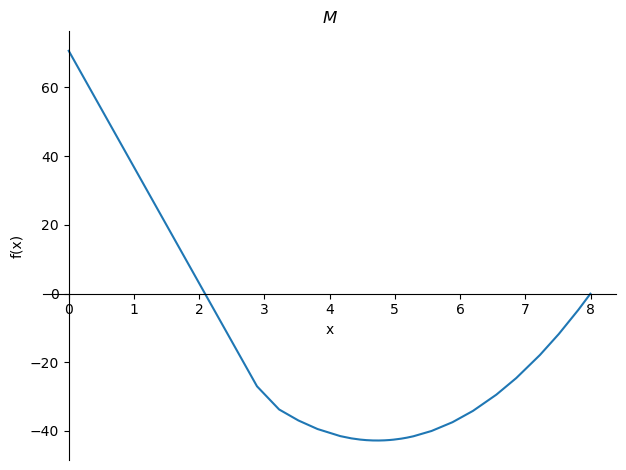

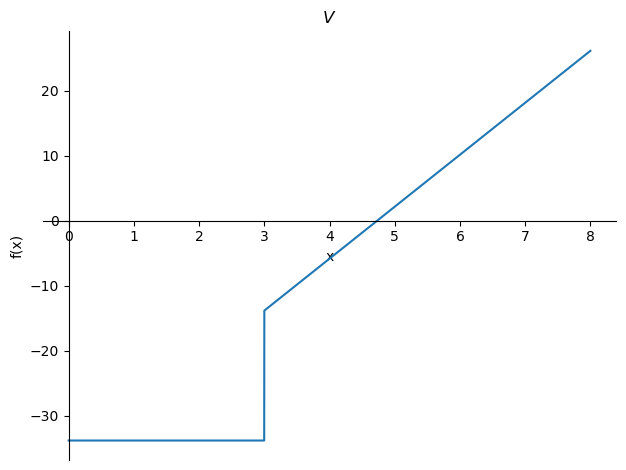

In [10]:
sp.plot(-w,title='$w$');
sp.plot(-phi,title='$\phi$');
sp.plot(-M,title='$M$');
sp.plot(-V,title='$V$');